## I confirm that this is my own work, except where clearly indicated.

### Importing packages 

In [462]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import math
import seaborn as sns

### Reading the data in, and splitting into training and testing sets

In [463]:
input_data = pd.read_csv("train.csv")

In [464]:
input_data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [465]:
# Drop ID 
input_data = input_data.drop("id", axis=1)

In [466]:
input_data["target"].unique()

array([0, 1])

In [467]:
Y = input_data["target"]
X = input_data.iloc[:,1:]

In [468]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, stratify=Y, test_size=0.30, random_state=42)

In [469]:
del X, Y

Checking the training data, for any outliers, it seems mostly fine

In [470]:
X_Train.describe()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,...,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000,416648.000000
mean,1.900295,1.358888,4.421207,0.417319,0.406293,0.392898,0.257227,0.164206,0.185670,0.000391,...,5.440413,1.440869,2.873142,7.537458,0.121973,0.628420,0.554055,0.287178,0.349043,0.153153
std,1.984169,0.664198,2.698962,0.493380,1.352404,0.488395,0.437106,0.370463,0.388841,0.019775,...,2.330926,1.201221,1.695121,2.748044,0.327256,0.483228,0.497070,0.452446,0.476668,0.360136
min,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Find the number of -1s in the data, and check the proportion of -1s in the data, also change the type of the categorical data to be categorical

In [471]:
list_of_missing = []
for col in X_Train.columns:
    if "cat" in col:
        X_Train[col] = pd.Categorical(X_Train[col])
        
    total = X_Train[X_Train[col] == -1].count()
    if total[0] > 0: 
        list_of_missing.append((col, total[0]/len(X_Train)))

In [472]:
list_of_missing.sort(key = lambda x: x[1]) 
list_of_missing

[('ps_car_11', 7.200322574451335e-06),
 ('ps_car_02_cat', 9.600430099268447e-06),
 ('ps_ind_04_cat', 0.00012960580634012404),
 ('ps_car_01_cat', 0.00017520784931164917),
 ('ps_ind_02_cat', 0.00033841516099921277),
 ('ps_car_09_cat', 0.0009744436550757474),
 ('ps_ind_05_cat', 0.00963163149709107),
 ('ps_car_07_cat', 0.0192296614888347),
 ('ps_car_14', 0.07168161133618786),
 ('ps_reg_03', 0.18111691403774888),
 ('ps_car_05_cat', 0.4475432499375972),
 ('ps_car_03_cat', 0.6908949520938538)]

In [473]:
# remove 3 columns with the highest -1 percentages, as the lowest is nearly 20%, and the highest has 70% missing data
X_Train = X_Train.drop(["ps_car_03_cat","ps_car_05_cat", "ps_reg_03"], axis=1)

Remove the same columns from the "test" data 

In [474]:
X_Test = X_Test.drop(["ps_car_03_cat","ps_car_05_cat", "ps_reg_03"], axis=1)

Impute across the -1s for the rest of the columns with the median for categorical columns and the mean otherwise

In [475]:
imputer_list = {}

In [476]:
from sklearn.impute import SimpleImputer

This trains the imputer with the means/medians of the training data, and changes the test data using that 

The imputers are all stored as well for the submission data, if there are -1s there, it will be transformed 
using the imputers from the training data.

In [477]:
for i in list_of_missing[0:-3]:
    name = i[0]
    if "cat" in name:
        imp = SimpleImputer(missing_values=-1, strategy='median')
    else:
        imp = SimpleImputer(missing_values=-1, strategy='mean')
        
    X_Train[name] = imp.fit_transform(X_Train[[name]])
    X_Test[name]  = imp.transform(X_Test[[name]])
    imputer_list[name] = imp

Check if there are any -1s left in the data

In [478]:
mask = np.column_stack([X_Train[col] == -1 for col in X_Train])
X_Train.loc[mask.any(axis=1)]

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin


print the data types as they need to be reset after selecting them from the extra trees classifier

In [479]:
X_Train.dtypes

ps_ind_01            int64
ps_ind_02_cat      float64
ps_ind_03            int64
ps_ind_04_cat      float64
ps_ind_05_cat      float64
ps_ind_06_bin        int64
ps_ind_07_bin        int64
ps_ind_08_bin        int64
ps_ind_09_bin        int64
ps_ind_10_bin        int64
ps_ind_11_bin        int64
ps_ind_12_bin        int64
ps_ind_13_bin        int64
ps_ind_14            int64
ps_ind_15            int64
ps_ind_16_bin        int64
ps_ind_17_bin        int64
ps_ind_18_bin        int64
ps_reg_01          float64
ps_reg_02          float64
ps_car_01_cat      float64
ps_car_02_cat      float64
ps_car_04_cat     category
ps_car_06_cat     category
ps_car_07_cat      float64
ps_car_08_cat     category
ps_car_09_cat      float64
ps_car_10_cat     category
ps_car_11_cat     category
ps_car_11          float64
ps_car_12          float64
ps_car_13          float64
ps_car_14          float64
ps_car_15          float64
ps_calc_01         float64
ps_calc_02         float64
ps_calc_03         float64
p

## Perform Feature Selection

#### Using Extra Trees

This performs feature selection using the extra trees classifier, the code is adapted from 

https://scikit-learn.org/stable/modules/feature_selection.html#tree-based-feature-selection
and
https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py



In [480]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [481]:
clf = ExtraTreesClassifier(n_estimators=50)

Fit training data

In [482]:
clf = clf.fit(X_Train, Y_Train)

Calculate and display importances

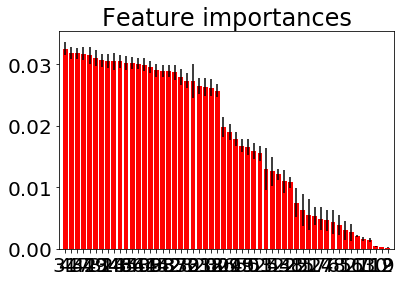

In [483]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_Train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_Train.shape[1]), indices)
plt.xlim([-1, X_Train.shape[1]])
plt.show()

The mean importance is the threshold when selecting, so checking what the mean is

In [484]:
np.mean(importances)

0.01851851851851852

Selecting features based on the feature importances

In [485]:
model = SelectFromModel(clf, prefit=True)

Fetching the column names which were kept

In [486]:
# this will return boolean mask for the columns
column_indices = model.get_support(indices=False)    
X_new = X_Train.loc[:, column_indices]                      
# the sliced dataframe, keeping selected columns
col_names = X_new.columns   
col_names

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02',
       'ps_car_01_cat', 'ps_car_06_cat', 'ps_car_09_cat', 'ps_car_11_cat',
       'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15',
       'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05',
       'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10',
       'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14'],
      dtype='object')

Only keep the selected columns

In [487]:
X_Train_Shaped = model.transform(X_Train)
X_Train_Shaped.shape    

(416648, 28)

In [488]:
X_Train_Shaped

array([[1, 7, 7, ..., 3, 3, 7],
       [5, 3, 7, ..., 3, 3, 7],
       [3, 7, 11, ..., 4, 2, 7],
       ...,
       [1, 2, 8, ..., 0, 0, 6],
       [3, 3, 7, ..., 0, 2, 9],
       [2, 7, 6, ..., 0, 2, 14]], dtype=object)

Select the same columns for the test set

In [489]:
X_Test_Shaped = model.transform(X_Test)

Convert back to a dataframe and add column names

In [490]:
X_Train_Shaped = pd.DataFrame(X_Train_Shaped)
X_Test_Shaped = pd.DataFrame(X_Test_Shaped)

In [491]:
X_Test_Shaped.columns = col_names
X_Train_Shaped.columns = col_names

Get the list of columns to one hot encode

In [492]:
list_of_cols = [x for x in X_Train_Shaped.columns if "cat" in x]

### Using Spearman Correlation to Perform Further Feature removal

In [493]:
import scipy.stats as st

Calculate the Spearman Correlation for each column and the target and plot the p values

In [494]:
spearman_corr = []
for col in X_Train_Shaped.columns:
    spearman_corr.append((col, st.spearmanr(X_Train_Shaped[col], Y_Train)[1]))                       

Text(0, 0.5, 'Correlation')

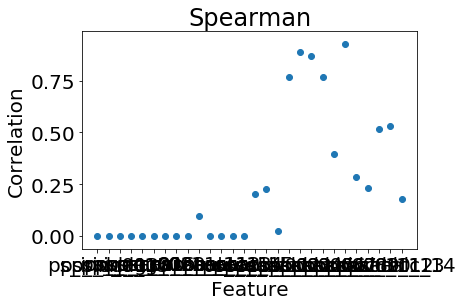

In [495]:
plt.scatter(X_Train_Shaped.columns, [x[1] for x in spearman_corr])
plt.title("Spearman")
plt.xlabel("Feature")
plt.ylabel("Correlation")

This suggests to remove all calculated fields effectively bar 1

In [496]:
list_to_remove = []
for i in filter(lambda x: x[1] >=0.05,spearman_corr):
    list_to_remove.append(i[0])

In [497]:
list_to_remove

['ps_car_11',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14']

Remove the Fields Spearman p values suggest to remove from both the training and the test data

In [498]:
X_Train_Shaped = X_Train_Shaped.drop(list_to_remove, axis=1)

In [499]:
X_Train_Shaped

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_car_01_cat,ps_car_06_cat,ps_car_09_cat,ps_car_11_cat,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_03
0,1,7,7,0.9,0.3,11,9,2,104,0.4,0.970058,0.374672,3.74166,0.2
1,5,3,7,0.7,0.2,7,11,2,104,0.447214,0.805033,0.424617,3,0.9
2,3,7,11,0.2,0.3,11,6,0,27,0.374166,0.784443,0.390768,3.31662,0.3
3,2,5,11,0.6,0.2,11,0,2,37,0.316228,0.757518,0.3755,3.31662,0
4,5,5,6,0.9,0.3,7,1,2,104,0.43589,0.830289,0.414126,3.16228,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416643,1,3,8,0.5,0.2,7,0,2,87,0.316228,0.720637,0.294449,3.4641,0.5
416644,2,7,5,0.3,0.1,11,15,2,41,0.547723,1.38223,0.532917,3,0.7
416645,1,2,8,0.4,0,6,1,0,74,0.374166,0.777193,0.371618,3.4641,0.5
416646,3,3,7,0.3,0,0,1,0,90,0.374166,0.740533,0.416653,3.16228,0.1


In [500]:
X_Test_Shaped = X_Test_Shaped.drop(list_to_remove, axis=1)

Data types were changed to object, and thus were reset manually to be what they should be from earlier

In [501]:
X_Train_Shaped.dtypes

ps_ind_01        object
ps_ind_03        object
ps_ind_15        object
ps_reg_01        object
ps_reg_02        object
ps_car_01_cat    object
ps_car_06_cat    object
ps_car_09_cat    object
ps_car_11_cat    object
ps_car_12        object
ps_car_13        object
ps_car_14        object
ps_car_15        object
ps_calc_03       object
dtype: object

In [502]:
for col in X_Train_Shaped.columns:
    if "cat" in col:
        X_Train_Shaped[col] = pd.Categorical(X_Train_Shaped[col])
    elif "ind" in col:
        X_Train_Shaped[col] = X_Train_Shaped[col].astype("int64")
    else:
        X_Train_Shaped[col] = X_Train_Shaped[col].astype("float64")

### Check correlation among remaining features

Vectorise the data, so that it shows on the correlation chart

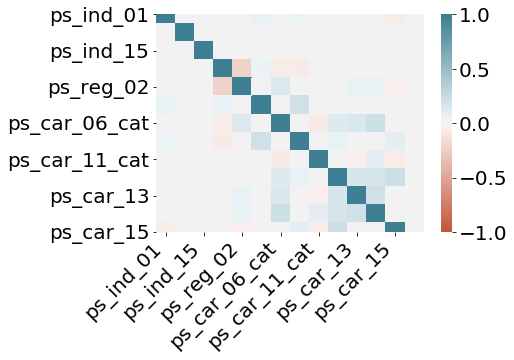

In [503]:
corr = X_Train_Shaped.apply(lambda x : pd.factorize(x)[0]).corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

There doesn't appear to be any bad correlation, but checking for sure
code for this cell taken from: 
https://stackoverflow.com/a/42323184

In [504]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_car_01_cat,ps_car_06_cat,ps_car_09_cat,ps_car_11_cat,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_03
ps_ind_01,1,-0.0038,0.0039,-0.0025,0.018,0.072,0.017,0.062,0.016,0.019,0.02,0.03,-0.057,-0.0024
ps_ind_03,-0.0038,1,-0.03,0.0076,0.029,-0.005,-0.019,-0.016,-0.017,-0.0094,-0.026,-0.032,0.016,0.0007
ps_ind_15,0.0039,-0.03,1,0.0053,-0.019,0.0074,-0.0025,0.022,-0.0016,0.013,-2.3e-05,-0.0013,0.025,0.0012
ps_reg_01,-0.0025,0.0076,0.0053,1,-0.22,0.063,-0.052,-0.065,-0.011,-0.0085,-0.0036,-0.02,-0.0089,0.0021
ps_reg_02,0.018,0.029,-0.019,-0.22,1,-0.012,0.15,0.0045,-0.0027,0.025,0.077,0.074,-0.042,0.0016
ps_car_01_cat,0.072,-0.005,0.0074,0.063,-0.012,1,0.0031,0.21,-0.012,0.024,0.0093,0.0022,0.0087,0.00048
ps_car_06_cat,0.017,-0.019,-0.0025,-0.052,0.15,0.0031,1,0.01,-0.068,0.13,0.15,0.22,-0.025,0.00032
ps_car_09_cat,0.062,-0.016,0.022,-0.065,0.0045,0.21,0.01,1,-0.013,0.075,0.022,0.015,0.095,-0.00056
ps_car_11_cat,0.016,-0.017,-0.0016,-0.011,-0.0027,-0.012,-0.068,-0.013,1,-0.026,-0.043,0.094,-0.06,0.0029
ps_car_12,0.019,-0.0094,0.013,-0.0085,0.025,0.024,0.13,0.075,-0.026,1,0.16,0.17,0.23,-0.00035


## One Hot Encoding

Save the column names to filter the submission data

In [505]:
submission_test_columns = X_Train_Shaped.columns

In [506]:
X_Train_Shaped.shape

(416648, 14)

Use pd.get_dummies with the list of categorical columns

In [508]:
X_Train_Shaped = pd.get_dummies(X_Train_Shaped, 
                                columns=list_of_cols)
X_Test_Shaped = pd.get_dummies(X_Test_Shaped, columns=list_of_cols)

In [509]:
X_Train_Shaped.shape

(416648, 149)

# More Imports and code

In [46]:
from sklearn import tree 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from plotml import * 

Code to make a confusion matrix look nicer taken from the plotml library

In [47]:
def make_confusion_matrix(Y_Test, Y_Pred, title="Confusion Matrix Of Target Accuracy"):
    cm = confusion_matrix(Y_Test, Y_Pred)
    plot_confusion_matrix(cm, labels=[0,1], 
                          title=title, 
                          cmap=plt.cm.Blues)

The main metric used is the Normalised Gini Coefficient (Gini) as used in the kaggle competition evaluation 
(https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/discussion/41029) 
and this requires the calculation of the Area under the Receiver Operating Characteristic Curve (AUC)
which was was displayed for the training (can be converted to gini trivially: Gini = (2 * AUC - 1).
                                          
the Gini was displayed for the predictions on the test sets as this was the main metric to compare models by 
as the best model on the test set would generalise best which is what would be required for unseen data.

Auc code adapted from (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)

In [48]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

def get_gini(Y_Test, Y_Pred):
    fpr, tpr, thresholds = roc_curve(Y_Test, Y_Pred)
    AUC = auc(fpr, tpr)
    gini = 2*AUC - 1
    print(gini)

# Classification

There were 4 approaches for classification

1. Classic ML algorithms, Decision Trees/Random Forests/Logistic Regresison with Class weights added to the loss function 
2. The best of these algorithms run on Under and Over Sampled data
3. Using Bagging and Random Forests which have been designed for unbalanced data 
4. Using Neural Networks

In each of the first 3 cases, the models were fitted to the x and y data, and then cross validated on the same training data. 

To evaluate the model, the confusion matrix was plotted and the Gini metric was displayed for results of predicting on the "test" data

The class weights were calculated as per 
(https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html)
and they estimate the class weights for the unbalanced data, which is shown as '0' is only weighted at about 0.5 
whereas 1 is weighted at 13.7

In [49]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(Y_Train),
                                                 Y_Train)

print(class_weights)

[ 0.51891337 13.71816146]


In [50]:
class_weights = dict(enumerate(class_weights))

## Class Imbalance

The class imbalance is shown below, there are many more 0s than there are 1s

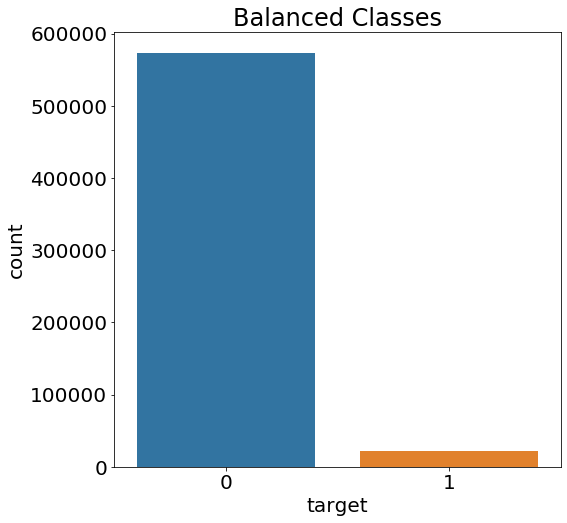

In [529]:
plt.figure(figsize=(8, 8))
sns.countplot('target', data=input_data)
plt.title('Balanced Classes')
plt.show()

## Class Weighted Decision Tree 

In [51]:
tree_class_weights = tree.DecisionTreeClassifier(class_weight = class_weights)
tree_class_weights.fit(X_Train_Shaped, Y_Train)

DecisionTreeClassifier(ccp_alpha=0.0,
                       class_weight={0: 0.5189133716267044,
                                     1: 13.718161464506782},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

Cross Validate using the ROC_AUC metric for the test data

In [52]:
K = 5
scores = cross_val_score(tree_class_weights, 
                         X_Train_Shaped, 
                         Y_Train, 
                         scoring='roc_auc', 
                         n_jobs=-1, 
                         cv=K)
print(scores)

[0.50777041 0.50457732 0.5036818  0.50576416 0.50321639]


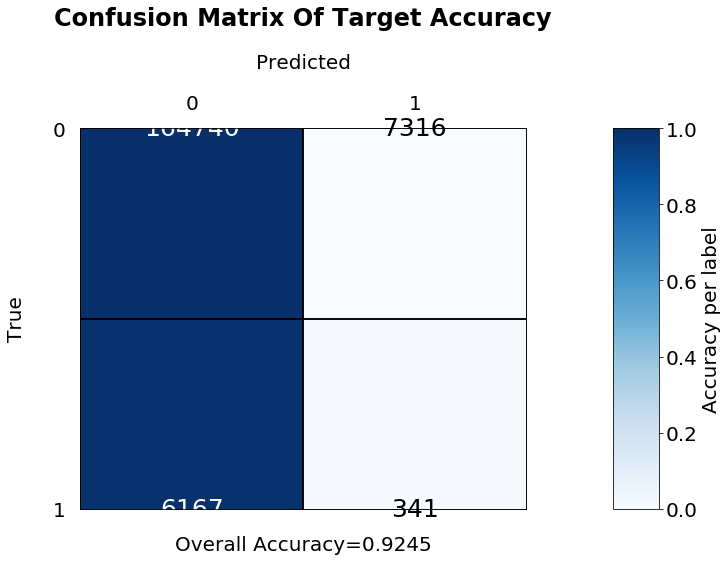

In [53]:
Y_Pred_tree_class_weights = tree_class_weights.predict(X_Test_Shaped)
make_confusion_matrix(Y_Test, Y_Pred_tree_class_weights)

The confusion matric reveals the accuracy is very high, but thats because its predicting lots more 0s than 1s,
both the false positive and false negative rates are high

The gini reveals a correspondingly poor result

In [54]:
get_gini(Y_Test, Y_Pred_tree_class_weights)

0.009876010123374801


##  Class Weighted Random Forest 

Running a Random Forest Classifier on the same data

In [55]:
forest = RandomForestClassifier(class_weight=class_weights)

In [56]:
forest.fit(X_Train_Shaped, Y_Train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.5189133716267044,
                                     1: 13.718161464506782},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
K = 5
scores = cross_val_score(forest, 
                         X_Train_Shaped, 
                         Y_Train,scoring='roc_auc', 
                         cv=K)
scores

array([0.56073427, 0.56368775, 0.55912909, 0.57230769, 0.56128611])

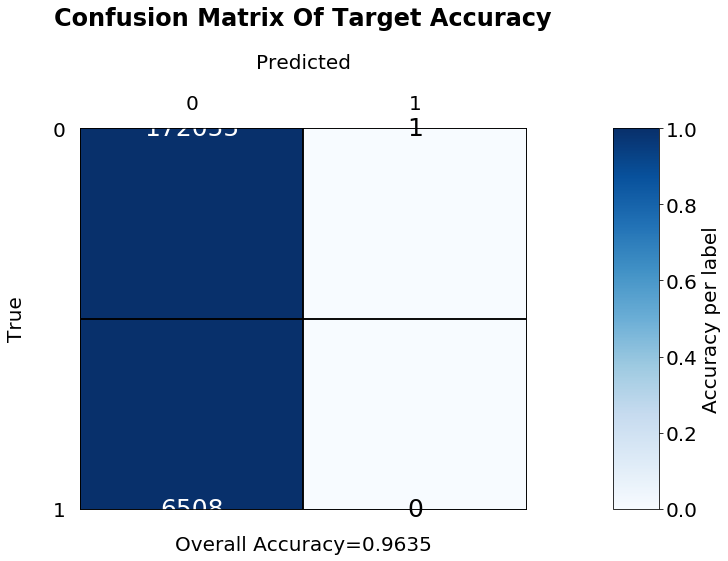

In [58]:
forest_pred = forest.predict(X_Test_Shaped)
make_confusion_matrix(Y_Test, forest_pred)

Similar to the decision tree, the accuraacy is even better, but that is due to it almost entirely predicting 0s, and 
unsurprisingly this is punished in the Gini metric, which becomes negative

In [59]:
get_gini(Y_Test, forest_pred)

-5.812061189325313e-06


## Class Weighted Logistic regression

The logistic regression for time reasons was restricted to 500 iterations

In [60]:
regr = LogisticRegression(class_weight=class_weights, max_iter=500)
regr.fit(X_Train_Shaped, Y_Train)

LogisticRegression(C=1.0,
                   class_weight={0: 0.5189133716267044, 1: 13.718161464506782},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=500, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [61]:
K = 5
scores = cross_val_score(regr, 
                         X_Train_Shaped, 
                         Y_Train, 
                         scoring='roc_auc', 
                         cv=K)
scores

/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

array([0.60536835, 0.61189043, 0.6081237 , 0.60374961, 0.59833797])

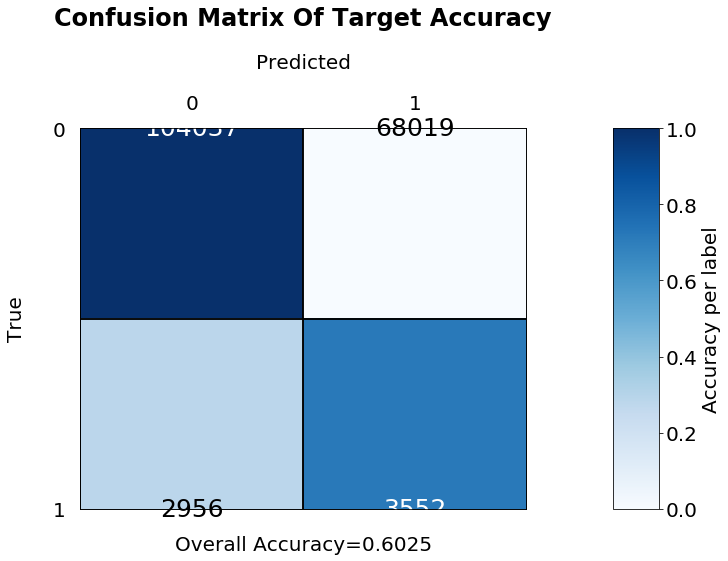

In [62]:
pred_regr = regr.predict(X_Test_Shaped)
make_confusion_matrix(Y_Test, pred_regr)

Interestingly, the Logistic Regression exhibits a much lower accuracy score, and has a larger number of
false positives, but much lower false negatives, and many more true positives. 

This is mirrored in the gini calculation, and this has a MUCH higher result than either the Decision Tree 
or the Random Forest

In [63]:
get_gini(Y_Test, pred_regr)

0.15045920713225858


# Now oversampling/Undersampling the data

The second approach was to over and under sample the data and see if the best classifier above would perform better.

Under and Over sampling code is taken from (https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb)

This uses the Synthetic Minority Over-sampling Technique to generate more data for the "1" target

In [64]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=7)
over_x, over_y = sm.fit_sample(X_Train_Shaped, Y_Train)


In [67]:
over_y = pd.DataFrame(over_y)
over_y.columns = ["target"]

Plotting the new distribution shows its even now

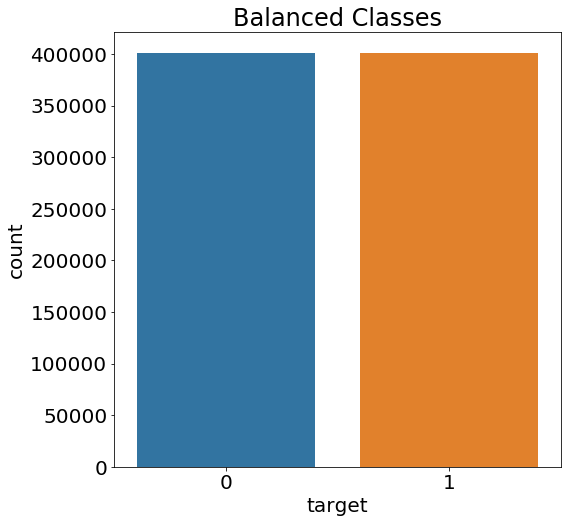

In [69]:
plt.figure(figsize=(8, 8))
sns.countplot('target', data=over_y)
plt.title('Balanced Classes')
plt.show()

## Undersampling

Undersampling just takes as many 0s as there are 1s in the data, from the existing data, i.e. reduces the data size

It achieved this by merging the training x and y datasets, and then filtering the target=1 rows, and then 
sampling that many rows from the dataset where the target = 0

In [70]:
merged = pd.concat([X_Train_Shaped.reset_index(drop=True), Y_Train.reset_index(drop=True)], axis=1)

In [71]:
merged

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_03,...,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104,target
0,1,7,7,0.9,0.3,0.400000,0.970058,0.374672,3.741657,0.2,...,0,0,0,0,0,0,0,0,1,0
1,5,3,7,0.7,0.2,0.447214,0.805033,0.424617,3.000000,0.9,...,0,0,0,0,0,0,0,0,1,0
2,3,7,11,0.2,0.3,0.374166,0.784443,0.390768,3.316625,0.3,...,0,0,0,0,0,0,0,0,0,0
3,2,5,11,0.6,0.2,0.316228,0.757518,0.375500,3.316625,0.0,...,0,0,0,0,0,0,0,0,0,0
4,5,5,6,0.9,0.3,0.435890,0.830289,0.414126,3.162278,0.5,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416643,1,3,8,0.5,0.2,0.316228,0.720637,0.294449,3.464102,0.5,...,0,0,0,0,0,0,0,0,0,0
416644,2,7,5,0.3,0.1,0.547723,1.382229,0.532917,3.000000,0.7,...,0,0,0,0,0,0,0,0,0,0
416645,1,2,8,0.4,0.0,0.374166,0.777193,0.371618,3.464102,0.5,...,0,0,0,0,0,0,0,0,0,0
416646,3,3,7,0.3,0.0,0.374166,0.740533,0.416653,3.162278,0.1,...,0,0,0,0,0,0,0,0,0,0


In [72]:
x_1 = merged[merged["target"] == 1]
x_0 = merged[merged["target"] == 0]

In [73]:
x_0_subsampled = x_0.sample(n=len(x_1),random_state=42)

In [74]:
x_0_subsampled

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_03,...,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104,target
210390,6,9,11,0.7,0.8,0.400000,0.867074,0.369865,3.464102,0.0,...,0,0,0,0,0,0,0,0,0,0
133776,2,8,9,0.9,0.6,0.374166,0.726121,0.393700,2.828427,0.9,...,0,0,0,0,0,0,0,0,0,0
403903,0,8,5,0.9,0.2,0.424264,0.740226,0.429535,2.828427,0.4,...,0,0,0,0,0,0,0,0,0,0
293033,2,2,7,0.7,0.9,0.374166,0.705615,0.388716,3.316625,0.7,...,0,0,0,0,0,0,0,0,0,0
181842,2,4,0,0.8,0.3,0.400000,0.761157,0.379473,3.000000,0.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406787,0,1,8,0.4,0.2,0.445870,0.852258,0.348855,3.000000,0.5,...,0,0,0,0,0,0,0,0,0,0
39033,2,4,5,0.9,1.0,0.374166,0.769337,0.384968,3.316625,0.3,...,0,0,0,0,0,1,0,0,0,0
3840,0,4,7,0.2,0.1,0.446990,0.767496,0.344964,2.449490,0.2,...,0,0,0,0,0,0,0,0,1,0
302578,5,3,11,0.9,1.2,0.424264,0.823493,0.393446,3.162278,0.5,...,0,0,0,0,0,0,0,0,1,0


In [75]:
under_x = x_1.append(x_0_subsampled)

In [76]:
under_x

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_03,...,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104,target
4,5,5,6,0.9,0.3,0.435890,0.830289,0.414126,3.162278,0.5,...,0,0,0,0,0,0,0,0,1,1
8,5,5,1,0.1,0.2,0.547723,1.769489,0.532917,3.605551,0.5,...,0,0,0,0,0,0,0,0,0,1
56,2,5,0,0.3,0.4,0.424264,0.947089,0.418569,2.828427,0.8,...,0,0,0,0,0,0,0,0,0,1
134,1,3,4,0.4,1.0,0.447214,0.986479,0.427200,3.464102,0.5,...,0,0,0,0,0,0,0,0,0,1
212,7,5,13,0.9,0.8,0.400000,0.606337,0.322490,2.645751,0.8,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406787,0,1,8,0.4,0.2,0.445870,0.852258,0.348855,3.000000,0.5,...,0,0,0,0,0,0,0,0,0,0
39033,2,4,5,0.9,1.0,0.374166,0.769337,0.384968,3.316625,0.3,...,0,0,0,0,0,1,0,0,0,0
3840,0,4,7,0.2,0.1,0.446990,0.767496,0.344964,2.449490,0.2,...,0,0,0,0,0,0,0,0,1,0
302578,5,3,11,0.9,1.2,0.424264,0.823493,0.393446,3.162278,0.5,...,0,0,0,0,0,0,0,0,1,0


In [77]:
under_y = under_x["target"]

Remove the target from the subsampled x dataframe

In [78]:
under_x = under_x.drop("target", axis=1)

In [79]:
under_x.shape

(30372, 149)

In [80]:
under_y.shape

(30372,)

The data is balanced the same as oversampling, but with much less datapoints as there are only so many 0s as 1s in 
the original data

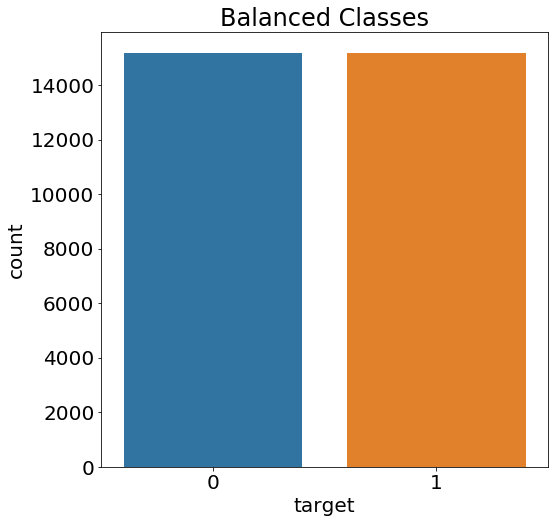

In [532]:
plt.figure(figsize=(8, 8))
sns.countplot(under_y)
plt.title('Balanced Classes')
plt.show()

## Running Logistic Regression on the Over and Under Sampled data

The logistic regression ran the best, and thus was tested in the same pattern, where the data (in this case over or undersampled)
was first fit and then cross validated using the AUC metric, and then the confusion matrix and the gini metric was 
displayed for the test data

The important caveat with this is that there is no class weights applied, as the training data is balanced now.

NB: For time reasons this was (like the previous model) restricted to 500 iteration.

### Oversampling run

/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (stat

[0.87753608 0.95947841 0.96016835 0.96012312 0.96032143]


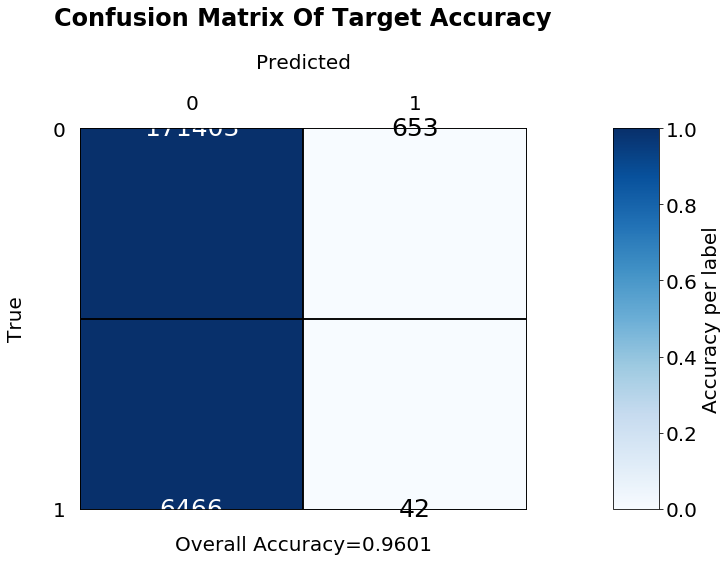

0.002658319618012106


In [82]:
regr = LogisticRegression(max_iter=500)
regr.fit(over_x, np.ravel(over_y))

K = 5
scores = cross_val_score(regr, over_x, over_y, scoring="roc_auc", cv=K)
print(scores)

pred_regr = regr.predict(X_Test_Shaped)
make_confusion_matrix(Y_Test, pred_regr)

get_gini(Y_Test, pred_regr)

This model performs significantly worse than the class weights model. The accuracy is high but again thats due to it entirely 
predicting almost entirely 0s. 

Notably, the cross validation scores of the AUC are very high ([0.88 0.96 0.96 0.96 0.96]), but that translates extremely poorly to the gini 
of 0.00266. This is most likely caused by the makeup of the test set not being that balanced, and thus the model overfit 
considerably, and not generalising at all well. Thus since the models are being compared on generalisation error, this 
is much worse than the initial logistic regression model.

### Undersampling Run

[0.60301042 0.61536128 0.60469878 0.59814185 0.59454804]


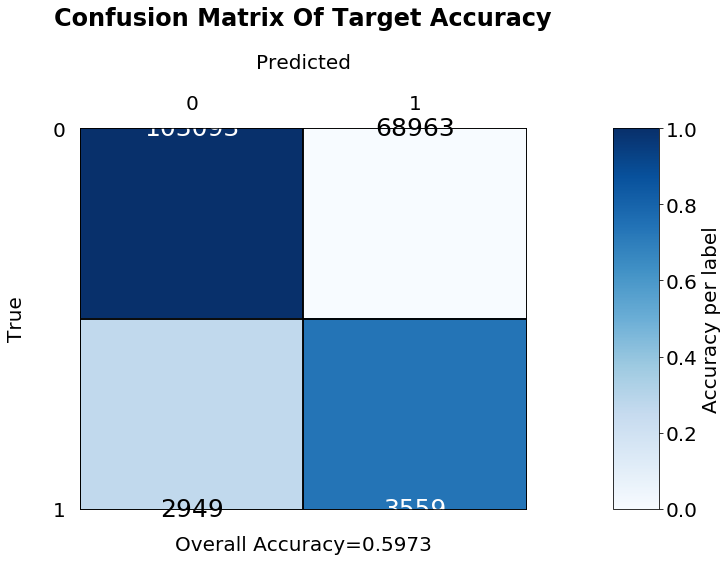

0.1460482206319298


In [533]:
regr = LogisticRegression(max_iter=500)
regr.fit(under_x, under_y)

K = 5
scores = cross_val_score(regr, under_x, under_y, scoring="roc_auc", cv=K)
print(scores)

pred_regr = regr.predict(X_Test_Shaped)
make_confusion_matrix(Y_Test, pred_regr)

get_gini(Y_Test, pred_regr)

This model is similar if slightly worse than the original logistic regression, this is most likely because this isn't 
doing anything in particular to account for extra 0s in the test set. There are large numbers of false positives and 
the gini is slightly worse

# Using Algorithms designed for unbalanced datasets

There were 2 algorithms tried which were designed for unbalanced data. They were both from the imblearn package
(https://imbalanced-learn.readthedocs.io/en/stable/api.html#module-imblearn.ensemble)

One algorithm was to try a different approach, Bagging, and the other was to try the random forest
 
They were run in the same manner as the algorithms above, where it was trained and cross validated on the training 
data (in this case the normal unbalanced data with no class weights added) and then evaluated on the test set

## Bagging 

In [84]:
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedBaggingClassifier

In [85]:
bagging_model = BalancedBaggingClassifier()
bagging_model.fit(X_Train_Shaped, Y_Train)

BalancedBaggingClassifier(base_estimator=None, bootstrap=True,
                          bootstrap_features=False, max_features=1.0,
                          max_samples=1.0, n_estimators=10, n_jobs=None,
                          oob_score=False, random_state=None, replacement=False,
                          sampling_strategy='auto', verbose=0,
                          warm_start=False)

In [86]:
scores = cross_val_score(bagging_model, X_Train_Shaped, Y_Train, scoring='roc_auc', cv=5)
scores

array([0.56249599, 0.5597653 , 0.55498336, 0.56122885, 0.55928103])

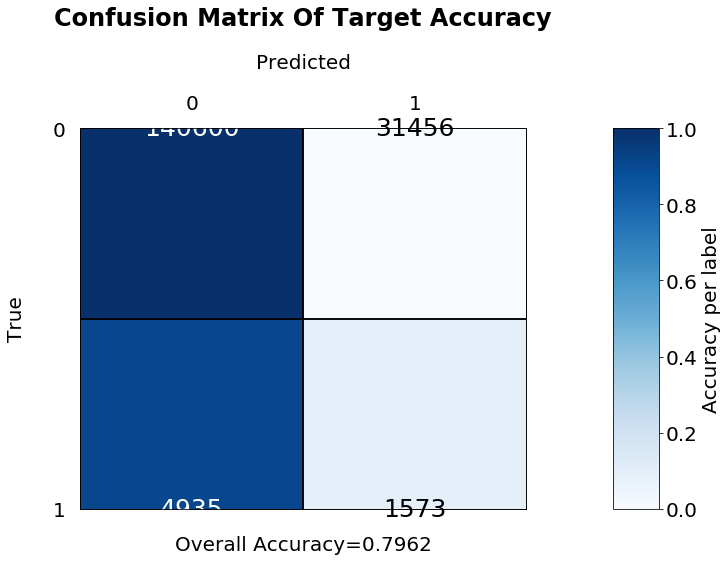

In [87]:
predicted_bagging = bagging_model.predict(X_Test_Shaped)
make_confusion_matrix(Y_Test, predicted_bagging)

In [88]:
get_gini(Y_Test, predicted_bagging)

0.058878323202271154


This performs fairly in the middle with respect to the algorithms tried out thus far, its not as good as the logistic regression for either the confusion matrix or the gini, and its not as bad as the worst results seen thus far

## Balanced RandomForestClassifier

In [89]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [90]:
balanced_random_forest = BalancedRandomForestClassifier(n_estimators=100)
balanced_random_forest.fit(X_Train_Shaped, Y_Train)

BalancedRandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                               criterion='gini', max_depth=None,
                               max_features='auto', max_leaf_nodes=None,
                               max_samples=None, min_impurity_decrease=0.0,
                               min_samples_leaf=2, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=100,
                               n_jobs=None, oob_score=False, random_state=None,
                               replacement=False, sampling_strategy='auto',
                               verbose=0, warm_start=False)

In [91]:
scores = cross_val_score(balanced_random_forest, X_Train_Shaped, Y_Train, scoring='roc_auc', cv=5)
scores

array([0.61244255, 0.61159717, 0.6141127 , 0.61018161, 0.60460037])

In [92]:
pred_balanced_rf = balanced_random_forest.predict(X_Test_Shaped)

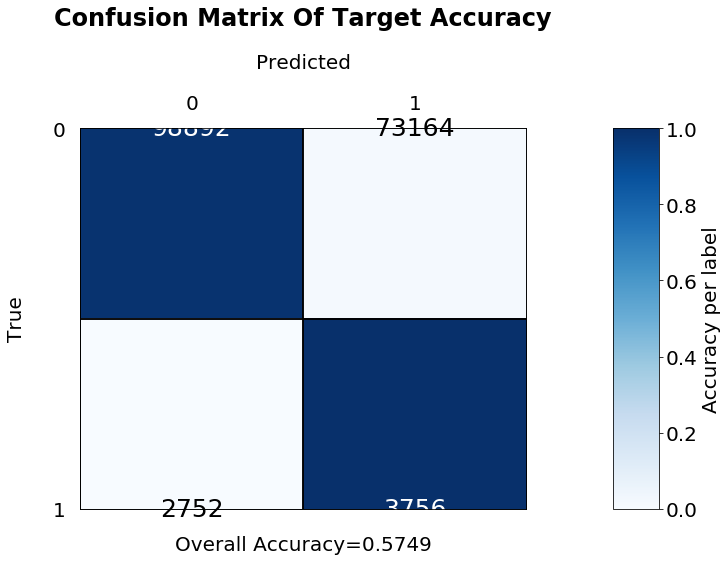

In [93]:
make_confusion_matrix(Y_Test, pred_balanced_rf)

In [94]:
get_gini(Y_Test, pred_balanced_rf)

0.15190218796133026


This performed slightly better than the logistic regression on the gini value on the test set. The AUC scores on the training set are in keeping with the trend of being around 0.6 (aside from the oversampled data where is was closer to 0.9, however that was most likely overfitting) but the test set results are varying considerably.


# Neural Network Based Approach

The neural network used was implemented in Keras

In [200]:
import tensorflow as tf 
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [201]:
np.random.seed(42) 
tf.random.set_seed(42)

The model was made up of 3 dense layers, an input, one hidden, and an output layer. Initially the neurons were set to a large number (512) and a dropout layer was added between each pair of dense layers(this would allow the removal of neuron output being passed into the next layer). 

A batch normalisation layer was also added to speed up network training and avoid issues such as covariate shift.


In [202]:
def make_model(train_x):
    dropout_threshold = 0.5
    model = keras.models.Sequential([
        keras.layers.Dense(512, activation="relu", 
                           input_shape=train_x.shape[1:]),
        keras.layers.Dropout(dropout_threshold),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(512, activation="relu"), 
        keras.layers.Dropout(dropout_threshold),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1, activation="sigmoid")
    ]) 
    return model

The loss used in the data was the Binary Cross entropy loss, which was used in the Tensorflow example
https://www.tensorflow.org/tutorials/structured_data/imbalanced_data 

The main metrics which were tracked were the AUC and the accuracy on the training set. The epochs were set to 30, but the network usually converged before then even with the patience set to 5

In [203]:
def compile_and_run(model, x_train, y_train, 
                    x_valid, y_valid, class_weights):
    model.compile(loss="binary_crossentropy", 
                  optimizer="sgd", 
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, 
                                                      restore_best_weights=True)
    
    history = model.fit(x_train, y_train, epochs=30, 
                        verbose=0, 
                        validation_data=(x_valid,y_valid), 
                        callbacks=[early_stopping_cb],
                        class_weight=class_weights)
    return history


The Roc curve was plotted for the NN output, which would also print the Gini metric

In [204]:
def plot_roc_curve(Y_Test, pred):
    
    y_pred_keras = pred.ravel()
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_Test, 
                                                       y_pred_keras)
    auc_keras = auc(fpr_keras, tpr_keras)
    print("GINI " + str(2*auc_keras -1))
    
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

This was used initially to figure out when covergence was happening

In [205]:
def plot_history(history):
    pd.DataFrame(history.history).plot(figsize=(12,8)) 
    plt.xlabel("epoch") 
    plt.grid(True) 
    plt.gca().set_ylim(0,1) 
    plt.show()

## Initial Run

The data is imbalanced, and thus as in the examples above, the class weights were added to the keras model. This runs on the initial data itself

In [540]:
x_train, x_valid, \
y_train, y_valid = train_test_split(X_Train_Shaped, 
                                    Y_Train, 
                                    random_state=42, 
                                    test_size=0.20,
                                    stratify=Y_Train)

In [541]:
scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train) 
x_valid = scaler.transform(x_valid) 
x_test = scaler.transform(X_Test_Shaped)

Calculate the class weights

In [542]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

print(class_weights)

[ 0.51891372 13.71791917]


In [543]:
class_weights = dict(enumerate(class_weights))

Make the model

In [544]:
basic_model = make_model(x_train)
basic_model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 512)               76800     
_________________________________________________________________
dropout_82 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_82 (Batc (None, 512)               2048      
_________________________________________________________________
dense_124 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_83 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_83 (Batc (None, 512)               2048      
_________________________________________________________________
dense_125 (Dense)            (None, 1)               

Run the model

In [ ]:
basic_model_history = compile_and_run(basic_model, x_train, y_train, 
                           x_valid, y_valid, class_weights)

  ...
    to  
  ['...']
  ...
    to  
  ['...']


Get the Binary Cross Entropy loss, accuracy and the AUC values on the test set 

In [ ]:
basic_model.evaluate(x_test, Y_Test)

Predict the probabilities on the test data

In [ ]:
pred = basic_model.predict(x_test)

Make the confusion matrix on the predicted classes, 

NB: the probability threshold on which it decides 0 or 1, can be designed manually by using tf.greater 
on the probablity output

In [ ]:
make_confusion_matrix(Y_Test, basic_model.predict_classes(x_test))

Plot the ROC curve and get the Gini on the test set

In [ ]:
plot_roc_curve(Y_Test, pred)

Immediately it is noticeable there is an improvement on any of the classifiers before on the gini, the AUC (denoted by area) in the plot is 0.59 on the test data. 

NB: The history stored the loss/Accuracy/AUC values for the training data, but the classifiers were compared on the testing data, so analysis was not done on the training data results.

## Oversampled Data 


The same process was repeated on the oversampled data, however with one important caveat that the class weights were 
each 1, as the oversampled data training data was evenly distributed.

In [238]:
x_train_over, x_valid_over, \
y_train_over, y_valid_over  = train_test_split(over_x, 
                                               over_y, 
                                               random_state=42, 
                                               test_size=0.20,
                                               stratify=over_y)

In [239]:
over_sampled_scaler = StandardScaler() 
x_train_over = over_sampled_scaler.fit_transform(x_train_over) 
x_valid_over = over_sampled_scaler.transform(x_valid_over) 
x_test_over = over_sampled_scaler.transform(X_Test_Shaped)

In [240]:
class_weights = {0:1, 1:1}

oversampled_model = make_model(x_train_over)
oversampled_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 512)               76800     
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 512)               2048      
_________________________________________________________________
dense_46 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 512)               2048      
_________________________________________________________________
dense_47 (Dense)             (None, 1)               

In [241]:
oversampled_history = compile_and_run(oversampled_model, 
                                      x_train_over, 
                                      y_train_over, 
                                      x_valid_over, 
                                      y_valid_over, 
                                      class_weights)

  ...
    to  
  ['...']
  ...
    to  
  ['...']


In [242]:
oversampled_model.evaluate(x_test_over, Y_Test)

178564/178564 [==============================] - 6s 35us/sample - loss: 0.2232 - accuracy: 0.9528 - auc: 0.5283


[0.22322678364831186, 0.95282924, 0.5282898]

In [243]:
pred_over = oversampled_model.predict(x_test_over)

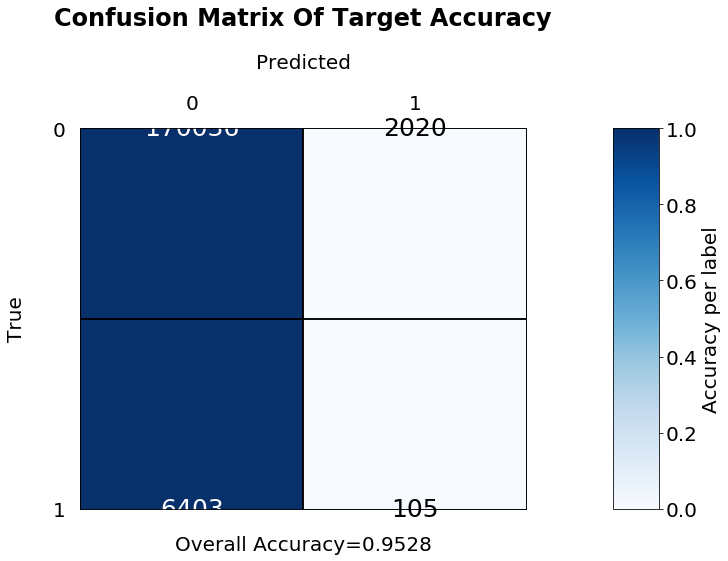

In [534]:
make_confusion_matrix(Y_Test, oversampled_model.predict_classes(x_test_over))

GINI 0.056681570370493706


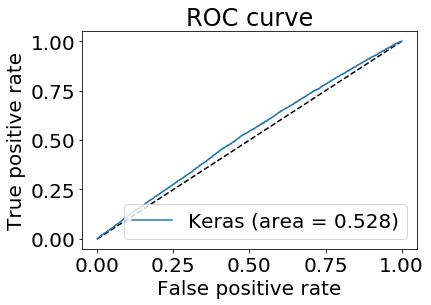

In [246]:
plot_roc_curve(Y_Test, pred_over)

Compared to the initial model, and in line with past results, the oversampled data performs much more poorly on the test data with a gini of 0.057 compared to 0.19 for the initial model, furthermore there is evidence its overfitting on the training set, as the AUC values are close to 0.96 as shown below.

In [ ]:
oversampled_history.history["auc"][0:5]

## Undersampling

The final neural network was trained on the undersampled data, as above, the class weights are both set to 1 for this run

In [247]:
x_train_under, x_valid_under, \
y_train_under, y_valid_under = train_test_split(under_x, 
                                    under_y, 
                                    random_state=42, 
                                    test_size=0.20,
                                    stratify=under_y)

In [248]:
under_sampled_scaler = StandardScaler() 
x_train_under = under_sampled_scaler.fit_transform(x_train_under) 
x_valid_under = under_sampled_scaler.transform(x_valid_under) 
x_test_under = under_sampled_scaler.transform(X_Test_Shaped)

In [249]:
class_weights = {0:1, 1:1}

undersampled_model = make_model(x_train_under)
undersampled_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 512)               76800     
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 512)               2048      
_________________________________________________________________
dense_49 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_33 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 512)               2048      
_________________________________________________________________
dense_50 (Dense)             (None, 1)               

In [250]:
undersampled_history = compile_and_run(undersampled_model, 
                                       x_train_under, 
                                       y_train_under, 
                                       x_valid_under, 
                                       y_valid_under, 
                                       class_weights)

  ...
    to  
  ['...']
  ...
    to  
  ['...']


In [251]:
undersampled_model.evaluate(x_test_under, Y_Test)

178564/178564 [==============================] - 6s 34us/sample - loss: 0.6703 - accuracy: 0.6223 - auc: 0.5937


[0.6702910067720499, 0.62225866, 0.59372073]

In [252]:
pred_under = undersampled_model.predict(x_test_under)

In [253]:
class_predictions_under = [int(i) for i in list(tf.greater(pred_under, 0.5))]

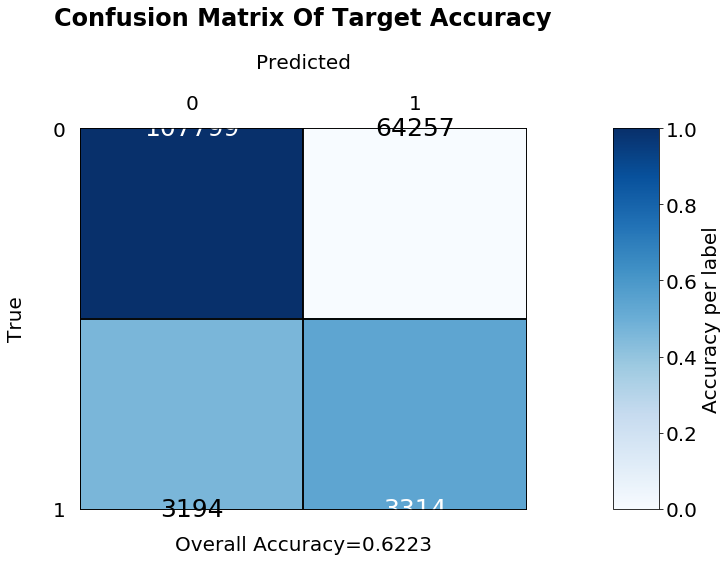

In [254]:
make_confusion_matrix(Y_Test, class_predictions_under)

GINI 0.18786019686590794


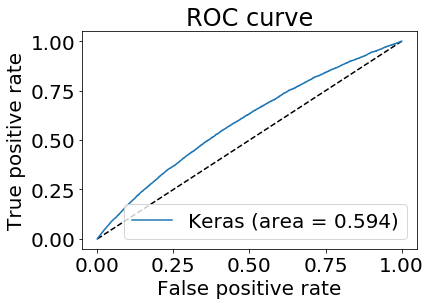

In [255]:
plot_roc_curve(Y_Test, pred_under)

As in the Logistic Regression, the undersampled results are extremely close (and slightly worse) than the initial model with class weight, and the AUC results on the training data (shown below) are much closer to the test data, which shows that it isn't overfitting.

In [539]:
undersampled_history.history["auc"]

[0.52225405,
 0.5450734,
 0.5518004,
 0.55306804,
 0.5551746,
 0.5598378,
 0.56572765,
 0.56417155,
 0.5603025,
 0.5670876,
 0.571925,
 0.5704243,
 0.5723467,
 0.57433665,
 0.57391715]

## Parameter Tuning

The best model out of the the three tried was the initial model where the class weights were set. Thus a small amoung of tuning was tried to see if there might be an improvement in the test set output. (The final parameter configuration was picked to be the one which had the highest gini on the __test__ set, not the validation set, to allow a fairer comparison between the best Neural Network Model and the other models tried) 

The model code was rewritten to be paramaterised as opposed to fixed values

In [256]:
from tensorflow.keras import optimizers


In [257]:
def make_tuned_model(train_x, dropout_threshold, neurons):
    model = keras.models.Sequential([
        keras.layers.Dense(neurons, activation="relu", 
                           input_shape=train_x.shape[1:]),
        keras.layers.Dropout(dropout_threshold),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(neurons, activation="relu"), 
        keras.layers.Dropout(dropout_threshold),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1, activation="sigmoid")
    ]) 
    return model

In [258]:
def compile_and_run_tuned(model, x_train, y_train, 
                    x_valid, y_valid, class_weights, 
                    lr, verbose, epochs):
    opt = optimizers.SGD(lr=lr)
    model.compile(loss="binary_crossentropy", 
                  optimizer=opt, 
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]) 
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, 
                                                      restore_best_weights=True)
    history = model.fit(x_train, y_train, epochs=epochs, 
                        verbose=verbose, 
                        validation_data=(x_valid,y_valid), 
                        callbacks=[early_stopping_cb],
                        class_weight=class_weights)
    return history

In [259]:
def get_gini_keras(Y_Test, pred):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_Test, pred.ravel())
    auc_keras = auc(fpr_keras, tpr_keras)
    return (2 * auc_keras - 1)

The 3 params which were "tuned" were the dropout percentage, the number of neurons, and the learning rate

In [260]:
params = {
    "dropout":[0,0.2,0.5],
    "neurons":[256, 512],
    "lr":[1, 0.1, 0.01, 0.001],
}

Re-calculate the class weights

In [261]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.5189137183227522, 1: 13.717919170302082}

Rescale the data

In [262]:
x_train, x_valid, y_train, y_valid = train_test_split(X_Train_Shaped, Y_Train, random_state=42, test_size=0.20,stratify=Y_Train)

scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train) 
x_valid = scaler.transform(x_valid) 
x_test = scaler.transform(X_Test_Shaped)

Run the tuning, this was written manually as I wanted to compare on the results of the test set, which meant using my own functions. This would store the paramaters used, the highest AUC achieved on the training set, and Gini value on the training set, and the history for each model for each parameter combination. This would also track the best model tried thus far, so that it can be used for 

In [263]:
combination = []
best_model = None
best_gini = 0
for dropout in params["dropout"]:
    for neurons in params["neurons"]:
        for learning_rate in params["lr"]:
            model = make_tuned_model(x_train, dropout, neurons)
            history = compile_and_run_tuned(model,
                                            x_train, 
                                            y_train, 
                                            x_valid, 
                                            y_valid, 
                                            class_weights,
                                            learning_rate, 
                                            verbose=0, 
                                            epochs=30)
            
            training_auc = history.history["auc"][-1]
            prediction = model.predict(x_test)
            gini_metric = get_gini_keras(Y_Test, prediction)
            
            if gini_metric > best_gini:
                best_model = model
            
            thing = history
            combination.append(({
                                    "dropout":dropout,
                                    "neurons":neurons,
                                    "lr":learning_rate,
                                },
                                training_auc,
                                gini_metric, 
                                history))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']
  ...
    to  
  ['...']


In [264]:
combination

[({'dropout': 0, 'neurons': 256, 'lr': 1},
  0.54878545,
  0.20798517586461251,
  <tensorflow.python.keras.callbacks.History at 0x212adc290>),
 ({'dropout': 0, 'neurons': 256, 'lr': 0.1},
  0.6201801,
  0.21069878954662902,
  <tensorflow.python.keras.callbacks.History at 0x20b99bc90>),
 ({'dropout': 0, 'neurons': 256, 'lr': 0.01},
  0.62826943,
  0.18206160754853795,
  <tensorflow.python.keras.callbacks.History at 0x20bf14c90>),
 ({'dropout': 0, 'neurons': 256, 'lr': 0.001},
  0.62594986,
  0.1871835489861664,
  <tensorflow.python.keras.callbacks.History at 0x214c2cd90>),
 ({'dropout': 0, 'neurons': 512, 'lr': 1},
  0.5590878,
  0.20985620231877178,
  <tensorflow.python.keras.callbacks.History at 0x2127ada50>),
 ({'dropout': 0, 'neurons': 512, 'lr': 0.1},
  0.6208578,
  0.20516030336344504,
  <tensorflow.python.keras.callbacks.History at 0x2160a4f10>),
 ({'dropout': 0, 'neurons': 512, 'lr': 0.01},
  0.64381087,
  0.14770605928848246,
  <tensorflow.python.keras.callbacks.History at 0x21

In [269]:
sortedlist = sorted(combination, key=lambda x: x[2], reverse=True)

In [460]:
sortedlist[0]

({'dropout': 0.5, 'neurons': 512, 'lr': 0.1},
 0.60512733,
 0.21074131815232966,
 <tensorflow.python.keras.callbacks.History at 0x242e33ad0>)

In [272]:
print("GINI " + str(sortedlist[0][2]))

GINI 0.21074131815232966


In [278]:
best_model

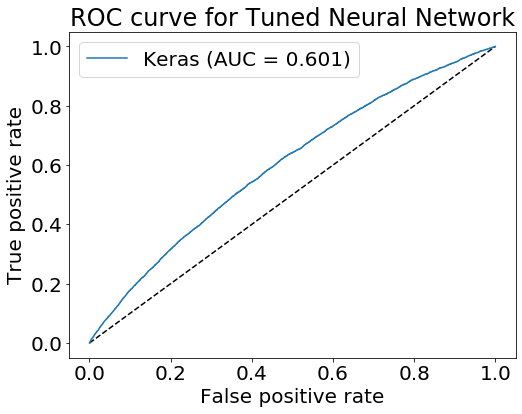

In [459]:
y_pred_keras = best_model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_Test, 
                                                       y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1, figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (AUC = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Tuned Neural Network')
plt.legend(loc='best')
plt.savefig("final_roc.png")

# Load in the prediction data

In [420]:
Test_Set = pd.read_csv("test.csv")

In [421]:
test_id = Test_Set["id"]

In [422]:
Test_Set.drop("id", axis=1)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892811,0,1,6,0,0,0,1,0,0,0,...,4,2,3,4,0,1,0,0,1,0
892812,5,3,5,1,0,0,0,1,0,0,...,6,2,2,11,0,0,1,1,0,0
892813,0,1,5,0,0,1,0,0,0,0,...,5,2,2,11,0,1,1,0,0,0
892814,6,1,5,1,0,0,0,0,1,0,...,1,1,2,7,1,1,0,0,0,0


In [423]:
Test_Set_filtered = Test_Set[submission_test_columns]

In [428]:
Test_Set_filtered.shape

(892816, 14)

In [425]:
list_of_cols

['ps_car_01_cat', 'ps_car_06_cat', 'ps_car_09_cat', 'ps_car_11_cat']

In [430]:
minus_list = []
for col in Test_Set_filtered.columns:       
    total = Test_Set_filtered[Test_Set_filtered[col] == -1].count()
    if total[0] > 0: 
        minus_list.append(col)

In [431]:
minus_list

['ps_car_01_cat', 'ps_car_09_cat', 'ps_car_14']

In [432]:
for col in minus_list:
    Test_Set_filtered[col] = imputer_list[col]\
                                .transform(Test_Set_filtered[[col]])

/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jalajkhandelwal/Library/Python/3.7/lib/python/site-packages/ipykernel_l

In [433]:
minus_list = []
for col in Test_Set_filtered.columns:       
    total = Test_Set_filtered[Test_Set_filtered[col] == -1].count()
    if total[0] > 0: 
        minus_list.append(col)

In [435]:
Test_Set_Final = pd.get_dummies(Test_Set_filtered, 
                               columns=list_of_cols) 

In [436]:
Test_Set_Final.shape

(892816, 149)

In [437]:
scaled_test = scaler.transform(Test_Set_Final)

In [438]:
probabilities = best_model.predict_proba(scaled_test)

In [442]:
output_list = [i[0] for i in probabilities]

In [444]:
output_dataframe = pd.DataFrame(data={"id": test_id, "target": output_list})

In [446]:
output_dataframe.to_csv("output.csv", index=False)